<a href="https://colab.research.google.com/github/Gaukhar-ai/Gaukhar.Diamond.github/blob/master/Trading_Dashboard_Pt_2_%E2%80%94_Yfinance_%26_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install hvplot
#!pip install yfinance

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import yfinance as yf

In [3]:
#chipotle 3 year data (CMG)

In [4]:
cmg = yf.Ticker('CMG')
cmg_historical = cmg.history(start='2018-1-5', end='2021-1-5', interval='1d')
cmg_df = cmg_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 
                             'Stock Splits', 'Volume'])
#rename the 'close' to the ticker for that company.
cmg_df.rename(columns={'Close':'CMG'}, inplace=True)

In [5]:
#shopify data

In [6]:
shop = yf.Ticker('shop')
shop_historical = shop.history(start='2018-1-5', end='2021-1-5', 
                               interval='1d')
shop_df = shop_historical.drop(columns=['Open', 'High', 'Low', 'Dividends',
                                        'Stock Splits', 'Volume'])
#rename the 'close' column to mirror ticker symbol
shop_df.rename(columns={'Close':'SHOP'}, inplace=True)

In [7]:
#calculate daily returns for individual stocks

In [8]:
fb = yf.Ticker("FB")
fb_historical = fb.history(start="2018-1-5", end="2021-1-5", interval="1d")
fb_df = fb_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
## Rename the 'Close' column to the ticker for that company.
fb_df.rename(columns= {'Close':'FB'}, inplace=True)
## SHOPIFY DATA
facebook = yf.Ticker("fb")
facebook_historical = facebook.history(start="2018-1-5", end="2021-1-5", interval="1d")
facebook_df = facebook_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
## Rename the 'Close' column to mirror ticker symbol
facebook_df.rename(columns= {'Close':'FB'}, inplace=True)

In [9]:
tsla = yf.Ticker("TSLA")
tsla_historical = tsla.history(start="2018-1-5", end="2021-1-5", interval="1d")
tsla_df = tsla_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
## Rename the 'Close' column to the ticker for that company.
tsla_df.rename(columns= {'Close':'TSLA'}, inplace=True)
## SHOPIFY DATA
tesla = yf.Ticker("tsla")
tesla_historical = tesla.history(start="2018-1-5", end="2021-1-5", interval="1d")
tesla_df = tesla_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
## Rename the 'Close' column to mirror ticker symbol
tesla_df.rename(columns= {'Close':'TSLA'}, inplace=True)

In [10]:
amzn = yf.Ticker("AMZN")
amzn_historical = amzn.history(start="2018-1-5", end="2021-1-5", interval="1d")
amzn_df = amzn_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
## Rename the 'Close' column to the ticker for that company.
amzn_df.rename(columns= {'Close':'AMZN'}, inplace=True)
## SHOPIFY DATA
amazon = yf.Ticker("amzn")
amazon_historical = amazon.history(start="2018-1-5", end="2021-1-5", interval="1d")
amazon_df = amazon_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])
## Rename the 'Close' column to mirror ticker symbol
amazon_df.rename(columns= {'Close':'AMZN'}, inplace=True)

In [11]:
shop_daily = shop_df.pct_change()
cmg_daily = cmg_df.pct_change()
fb_daily = fb_df.pct_change()
#panw_daily = panw.df.pct_change()
tsla_daily = tsla_df.pct_change()
amzn_daily = amzn_df.pct_change()

#concat into one portfolio with all the daily returns
portfolio_df = pd.concat([fb_daily, amzn_daily, tsla_daily,
                          shop_daily, cmg_daily], axis='columns', join='inner')
daily_portfolio = portfolio_df
daily_portfolio.dropna()

,FB,AMZN,TSLA,SHOP,CMG
Date,,,,,
2018-01-08,0.007653,0.014425,0.062638,0.016006,0.014914
2018-01-09,-0.002178,0.004676,-0.008085,-0.014419,0.002826
2018-01-10,-0.000160,0.001301,0.003326,0.002438,0.007609
2018-01-11,-0.000373,0.017818,0.009409,0.001171,0.011498
2018-01-12,-0.044736,0.022339,-0.005119,0.015027,0.005653
...,...,...,...,...,...
2020-12-28,0.035901,0.035071,0.002901,-0.064022,-0.007830
2020-12-29,-0.000794,0.011584,0.003465,0.021402,-0.006622
2020-12-30,-0.017740,-0.010882,0.043229,-0.007349,-0.012958


In [12]:
#Plotting

In [13]:
#!pip install mplcyberpunk

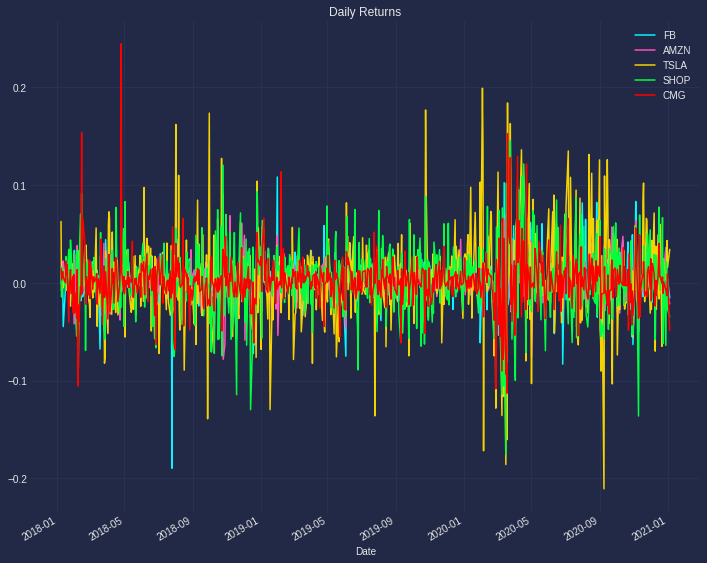

In [14]:
import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')
daily_portfolio.plot(figsize=(12,10), title='Daily Returns')

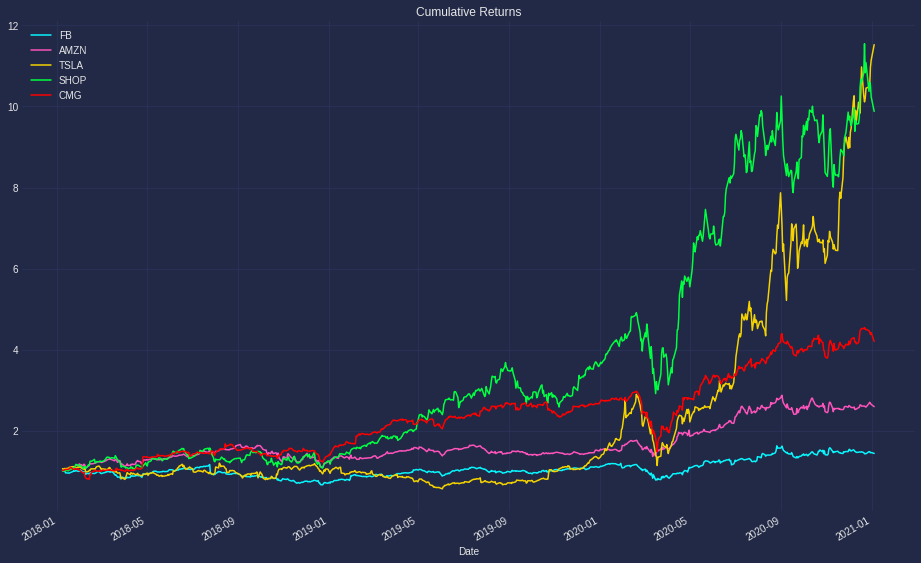

In [15]:
#cumulative returns:
cumulative_returns = (1+daily_portfolio).cumprod()
cumulative_returns.plot(figsize=(16, 10), title='Cumulative Returns')

In [16]:
#std standart deviation the lower the less risky
daily_portfolio.std()

FB      0.023967
AMZN    0.020956
TSLA    0.043043
SHOP    0.035142
CMG     0.026069
dtype: float64

In [17]:
#annual std (252 days)
daily_portfolio.std()*np.sqrt(252)

FB      0.380461
AMZN    0.332667
TSLA    0.683289
SHOP    0.557858
CMG     0.413833
dtype: float64

In [18]:
#correlation
corr_df = daily_portfolio.corr()
corr_df.style.background_gradient(cmap='summer')

,FB,AMZN,TSLA,SHOP,CMG
FB,1.000000,0.632288,0.331986,0.471451,0.441256
AMZN,0.632288,1.000000,0.390948,0.584107,0.388243
TSLA,0.331986,0.390948,1.000000,0.378384,0.327727
SHOP,0.471451,0.584107,0.378384,1.000000,0.405078
CMG,0.441256,0.388243,0.327727,0.405078,1.000000


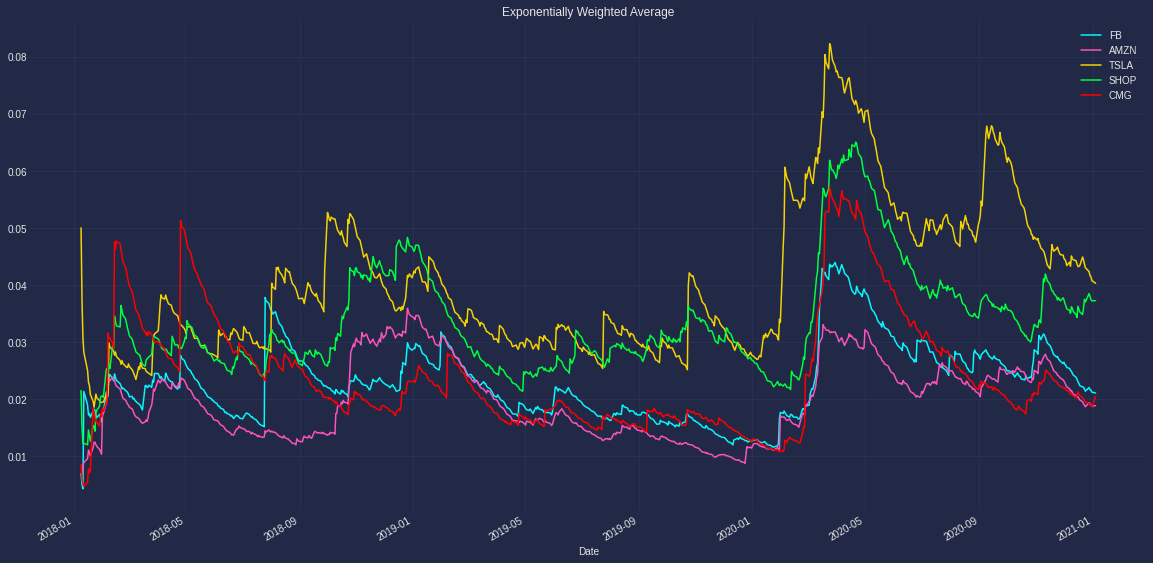

In [19]:
#calculate a rolling window using the exponential weighted moving average
daily_portfolio.ewm(halflife=21).std().plot(figsize=(20,10),
                                            title='Exponentially Weighted Average')

In [20]:
#EMA = places a greater weight and significance on the most recent data points


In [21]:
#calculate annualized shapre ratios:
sharpe_ratios=(daily_portfolio.mean()*252)/(daily_portfolio.std()*np.sqrt(252))
#visualize the sharpe ratio:
sharpe_ratios.hvplot.barh(figsize=(15,12), title='Sharpe Ratios', color='blue')

#sharpe ratio - measures the performance of an investment compared to a risk free asset, 
#after adjusting for its risk.

:Bars   [index]   (0)

In [22]:
#DASHBOARD

In [23]:
metrics = ['FB Annual Return', 'AMZN Annual Return', 'TSLA AR', 'SHOP AR',
           'CMG AR', 'FB Annual Volatility', 'AMZN AV', 'TSLA AV', 'SHOP AV'
           'FB Sharpe Ratio', 'AMZN SR', 'TSLA SR', 'SHOP SR', 'CMG SR']
columns = ['Backtest']
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

,Backtest
FB Annual Return,NaN
AMZN Annual Return,NaN
TSLA AR,NaN
SHOP AR,NaN
CMG AR,NaN
FB Annual Volatility,NaN
AMZN AV,NaN
TSLA AV,NaN
SHOP AVFB Sharpe Ratio,NaN
AMZN SR,NaN


In [24]:
#calculate annualized return
portfolio_evaluation_df.loc['FB Annual Return'] = daily_portfolio['FB'].std()*np.sqrt(252)
portfolio_evaluation_df.loc['AMZN AR'] = daily_portfolio['AMZN'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['TSLA AR'] = daily_portfolio['TSLA'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['SHOP AR'] = daily_portfolio['SHOP'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['CMG AR'] = daily_portfolio['CMG'].std() * np.sqrt(252)

In [25]:
# Calculate annual volatility
portfolio_evaluation_df.loc['FB Annual Volatility'] = daily_portfolio['FB'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['AMZN AV'] = daily_portfolio['AMZN'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['TSLA AV'] = daily_portfolio['TSLA'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['SHOP AV'] = daily_portfolio['SHOP'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['CMG AV'] = daily_portfolio['CMG'].std() * np.sqrt(252)

In [26]:
# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['FB Sharpe Ratio'] = sharpe_ratios['FB']
portfolio_evaluation_df.loc['AMZN SR'] = sharpe_ratios['AMZN']
portfolio_evaluation_df.loc['TSLA SR'] = sharpe_ratios['TSLA']
portfolio_evaluation_df.loc['SHOP SR'] = sharpe_ratios['SHOP']
portfolio_evaluation_df.loc['CMG SR'] = sharpe_ratios['CMG']
portfolio_evaluation_df.head(18)


,Backtest
FB Annual Return,0.380461
AMZN Annual Return,NaN
TSLA AR,0.683289
SHOP AR,0.557858
CMG AR,0.413833
FB Annual Volatility,0.380461
AMZN AV,0.332667
TSLA AV,0.683289
SHOP AVFB Sharpe Ratio,NaN
AMZN SR,1.12496


Serve Dashboard:
Click on the columns to sort the data to you liking.
Highest to Lowest and by Ticker
Lowest to Highest by metric & Ticker

In [27]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_evaluation_table=portfolio_evaluation_df.hvplot.table()